# Toy example using GNAR

SEOYEON CHOI  
7/8/23

# Import

In [1]:
import rpy2
import rpy2.robjects as ro 
from rpy2.robjects.vectors import FloatVector 
from rpy2.robjects.packages import importr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import torch
import itstgcn
import random

/home/csy/anaconda3/envs/temp_csy/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

In [2]:
def save_data(data_dict,fname):
    with open(fname,'wb') as outfile:
        pickle.dump(data_dict,outfile)

In [3]:
def load_data(fname):
    with open(fname, 'rb') as outfile:
        data_dict = pickle.load(outfile)
    return data_dict

# GNAR Data copy

In [4]:
%load_ext rpy2.ipython

In [5]:
%%R
library(GNAR)
library(igraph)

-   edge(list)
-   dist(list)

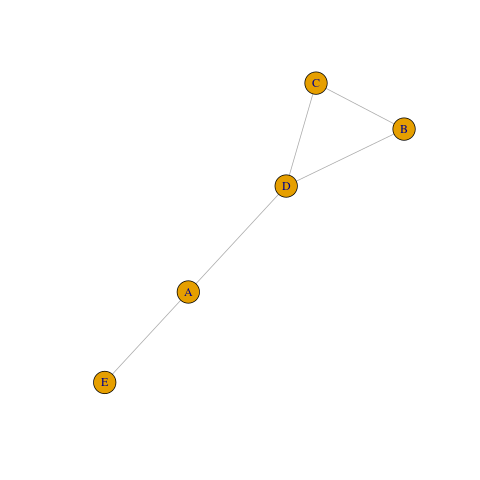

In [6]:
%%R
plot(fiveNet, vertex.label = c("A", "B", "C", "D", "E"))

In [7]:
%%R
as.matrix(fiveNet)

     [,1] [,2] [,3] [,4] [,5]
[1,]    0    0    0    1    1
[2,]    0    0    1    1    0
[3,]    0    1    0    1    0
[4,]    1    1    1    0    0
[5,]    1    0    0    0    0

In [8]:
%%R
data("fiveNode")
answer <- GNARfit(vts = fiveVTS, net = fiveNet, alphaOrder = 2, betaOrder = c(1, 1))
answer

Model: 
GNAR(2,[1,1]) 

Call:
lm(formula = yvec ~ dmat + 0)

Coefficients:
 dmatalpha1  dmatbeta1.1   dmatalpha2  dmatbeta2.1  
    0.20624      0.50277      0.02124     -0.09523  


$$X_{i,t} = \sum^p_{j=1}\big( \alpha_{i,j} X_{i,t-j} + \sum^C_{c=1} \sum^{s_j}_{r=1} \beta_{j,r,c} \sum_{1 \in \cal{N}^{(r)}_t (i)} \omega^{(t)}_{i,q,c} X_{q,t-j} \big) + u_{i,t}$$

-   $p \in \mathbb{N}$ is the maximum time lag
-   $[s] = (s_1, \dots , s_p)$ and $s_j \in \mathbb{N}_0$ is the maximum
    stage of neighbor dependence for time lag $j$, with
    $\mathbb{N}_0 = \mathbb{N} \cup \{ 0\}$
-   $\cal{N}^{(r)}_t (i)$ is the $r$th stage neighbour set of node $i$
    at time $t$
-   $\omega^{(t)}_{i,q,c} \in [0,1]$ is the connection weight between
    node $i$ and node $q$ at time $t$ if the path corresponds to
    covariate $c$

$$X_{A,t} = 0.206 X_{A,t−1}+0.503 (X_{E,t−1}+X_{D,t−1})/2+0.021 X_{A,t−2}−0.095(X_{E,t−2}+X_{D,t−2})/2+u_{A,t}$$

$$X_{B,t} = 0.206 X_{B,t−1}+0.503 (X_{C,t−1}+X_{D,t−1})/2+0.021 X_{B,t−2}−0.095(X_{C,t−2}+X_{D,t−2})/2+u_{B,t}$$

$$X_{C,t} = 0.206 X_{C,t−1}+0.503 (X_{B,t−1}+X_{D,t−1})/2+0.021 X_{C,t−2}−0.095(X_{B,t−2}+X_{D,t−2})/2+u_{C,t}$$

$$X_{D,t} = 0.206 X_{D,t−1}+0.503 (X_{A,t−1}+X_{B,t−1}+X_{C,t−1})/3+0.021 X_{D,t−2}−0.095(X_{A,t−1}+X_{B,t−1}+X_{C,t−1})/3+u_{D,t}$$

$$X_{E,t} = 0.206 X_{E,t−1}+0.503 (X_{A,t−1})+0.021 X_{E,t−2}−0.095(X_{A,t−1})+u_{E,t}$$

In [9]:
from statsmodels.tsa.arima.model import ARIMA

https://communities.sas.com/t5/SAS-Tech-Tip/SAS-%ED%99%9C%EC%9A%A9-%EB%85%B8%ED%95%98%EC%9A%B0-%EC%8B%9C%EA%B3%84%EC%97%B4-AR-1-%EA%B3%BC-AR-2/ta-p/792106

In [10]:
a_ylag1 = np.random.normal(size=1)
a_ylag2 = np.random.normal(size=1)

In [11]:
b_ylag1 = np.random.normal(size=1)
b_ylag2 = np.random.normal(size=1)

In [12]:
# alpha1 = 0.15
alpha1 = 0.4
alpha2 = 0.2
# alpha2 = 0.01
# beta1 = 0.503
beta1 = 0.01
beta2 = - 0.1
a_ar_values = []
a_ar_values_true = []
b_ar_values = []
b_ar_values_true = []

In [13]:
for i in range(500):
    a_e = np.random.normal(size=1) * 0.2
    b_e = np.random.normal(size=1)  * 0.2
    
    # a_y = alpha1 * a_ylag1 + alpha2 * a_ylag2 + a_e + beta1 * (e_ylag1 + d_ylag1) / 2 + beta2 * (e_ylag2 + d_ylag2) / 2
    # b_y = alpha1 * b_ylag1 + alpha2 * b_ylag2 + b_e + beta1 * (c_ylag1 + d_ylag1) / 2 + beta2 * (c_ylag2 + d_ylag2) / 2
    # c_y = alpha1 * c_ylag1 + alpha2 * c_ylag2 + c_e + beta1 * (b_ylag1 + d_ylag1) / 2 + beta2 * (b_ylag2 + d_ylag2) / 2
    # d_y = alpha1 * d_ylag1 + alpha2 * d_ylag2 + d_e + beta1 * (a_ylag1 + b_ylag1 + c_ylag1) / 3 + beta2 * (a_ylag2 + b_ylag2 + c_ylag2) / 3
    # e_y = alpha1 * e_ylag1 + alpha2 * e_ylag2 + e_e + beta1 * a_ylag1 + beta2 * a_ylag2
    a_y_true = alpha1 * a_ylag1 + alpha2 * a_ylag2 + beta1 * (b_ylag1) + beta2 * (a_ylag2)
    a_y = a_y_true + a_e
    b_y_true = alpha1 * b_ylag1 + alpha2 * b_ylag2 + beta1 * (a_ylag1) + beta2 * (b_ylag2)
    b_y = b_y_true + b_e
    
    a_ar_values_true.append(a_y_true[0])
    a_ar_values.append(a_y[0])
    b_ar_values_true.append(b_y_true[0])
    b_ar_values.append(b_y[0])
    
    a_ylag2 = a_ylag1
    b_ylag2 = b_ylag1
    
    a_ylag1 = a_y
    b_ylag1 = b_y

In [14]:
np.sum(a_ar_values)

In [15]:
np.sum(b_ar_values)

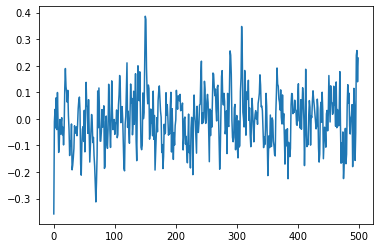

In [16]:
plt.plot(a_ar_values_true)

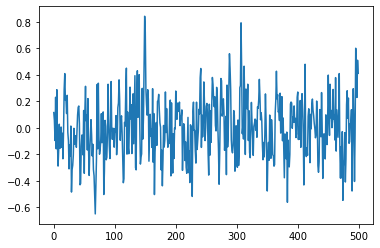

In [17]:
plt.plot(a_ar_values)

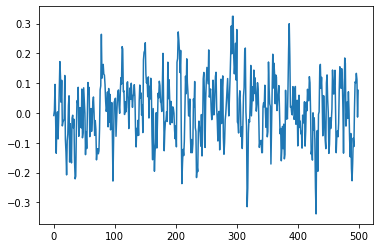

In [18]:
plt.plot(b_ar_values_true)

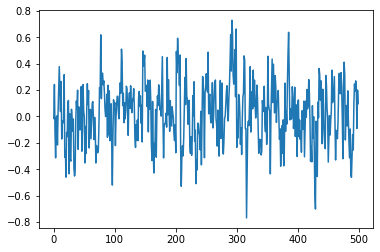

In [19]:
plt.plot(b_ar_values)

In [20]:
df = {'A' : a_ar_values, 'B' : b_ar_values}

In [21]:
_node_ids = {'node1':0, 'node2':1}

In [22]:
_edges = torch.tensor([[0,1],[1,0]]).tolist()

In [23]:
_FX1 = np.stack([a_ar_values,b_ar_values],axis=1).tolist()

In [24]:
data_dict = {'edges':_edges, 'node_ids':_node_ids, 'FX':_FX1}

In [25]:
save_data(data_dict,'toy_ex_dataset.pkl')

# Random

In [26]:
data_dict = load_data('toy_ex_dataset.pkl')

In [27]:
loader = itstgcn.DatasetLoader(data_dict)

In [28]:
dataset = loader.get_dataset(lags=2)

In [29]:
train_dataset, test_dataset = itstgcn.temporal_signal_split(dataset, train_ratio=0.8)

In [30]:
mindex_rand = itstgcn.rand_mindex(train_dataset,mrate=0.7)

/home/csy/Dropbox/blog/posts/GCN/itstgcn/utils.py:71: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343998658/work/torch/csrc/utils/tensor_new.cpp:245.)
  lags = torch.tensor(train_dataset.features).shape[-1]

In [31]:
train_dataset_miss_rand = itstgcn.miss(train_dataset,mindex_rand,mtype='rand')

In [32]:
train_dataset_padded_rand = itstgcn.padding(train_dataset_miss_rand) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [33]:
lrnr_rand = itstgcn.StgcnLearner(train_dataset_padded_rand)

In [34]:
lrnr_rand.learn(filters=12,epoch=5)

5/5

In [35]:
lrnr_rand_it = itstgcn.ITStgcnLearner(train_dataset_padded_rand)

In [36]:
lrnr_rand_it.learn(filters=12,epoch=5)

5/5

`-` 모형 평가 및 시각화

In [37]:
evtor_rand = itstgcn.Evaluator(lrnr_rand,train_dataset_padded_rand,test_dataset)

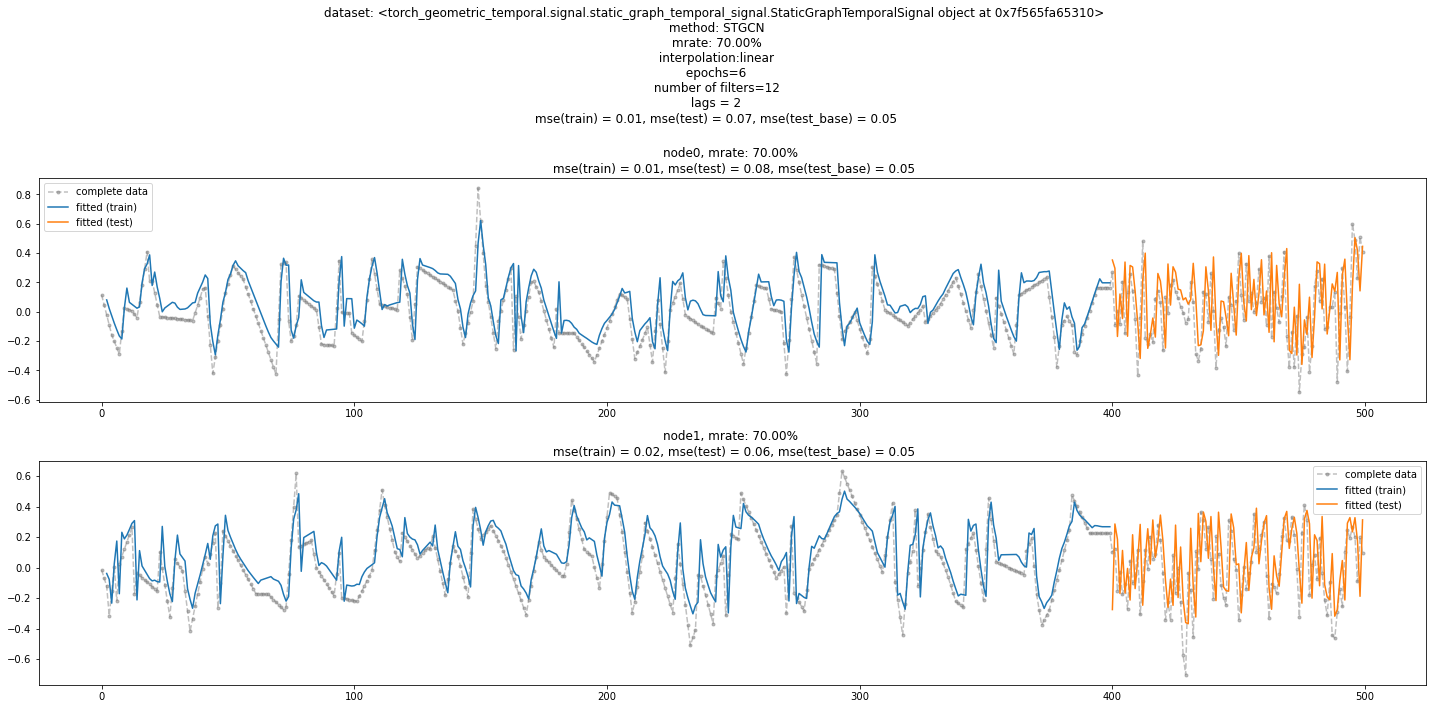

In [38]:
fig = evtor_rand.plot('--.',h=5,max_node=2,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig

In [39]:
evtor_rand_it = itstgcn.Evaluator(lrnr_rand_it,train_dataset_padded_rand,test_dataset)

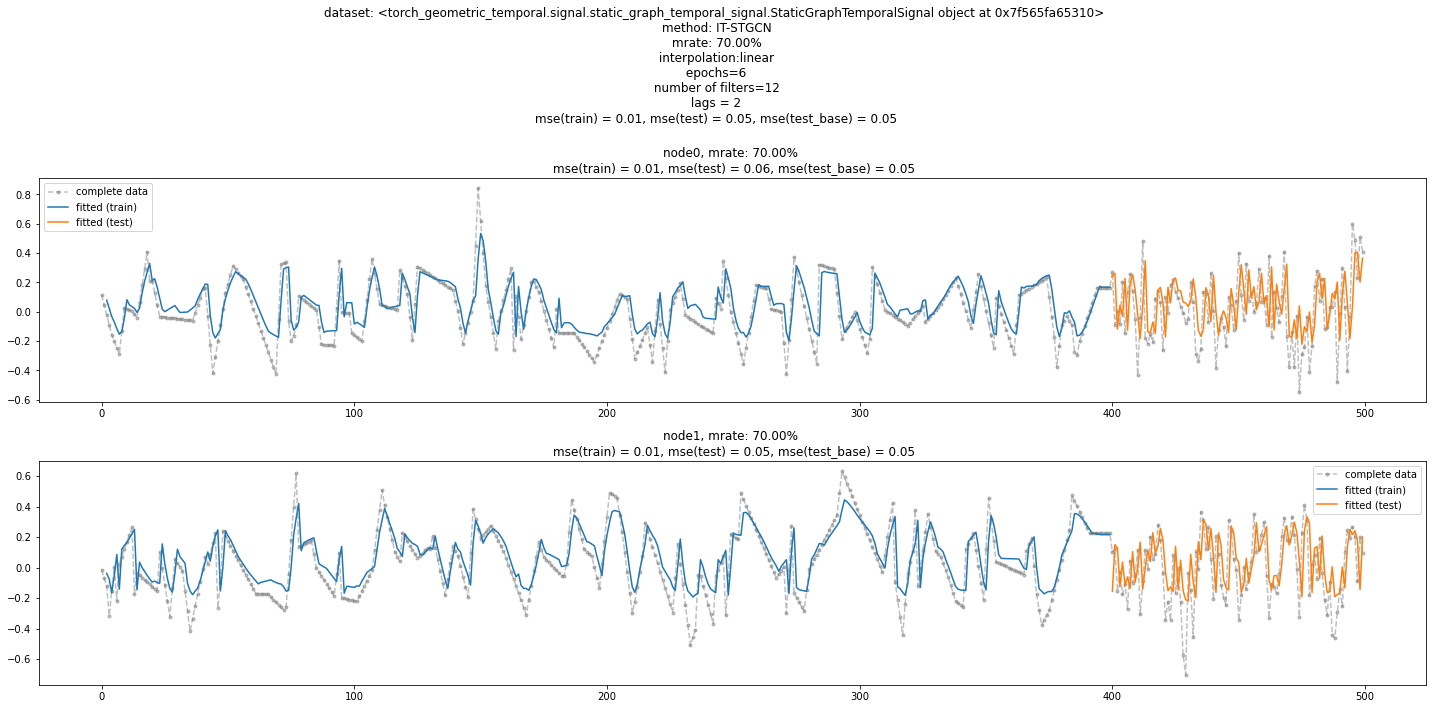

In [40]:
fig = evtor_rand_it.plot('--.',h=5,max_node=2,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig

In [41]:
evtor_rand.mse

In [42]:
evtor_rand_it.mse

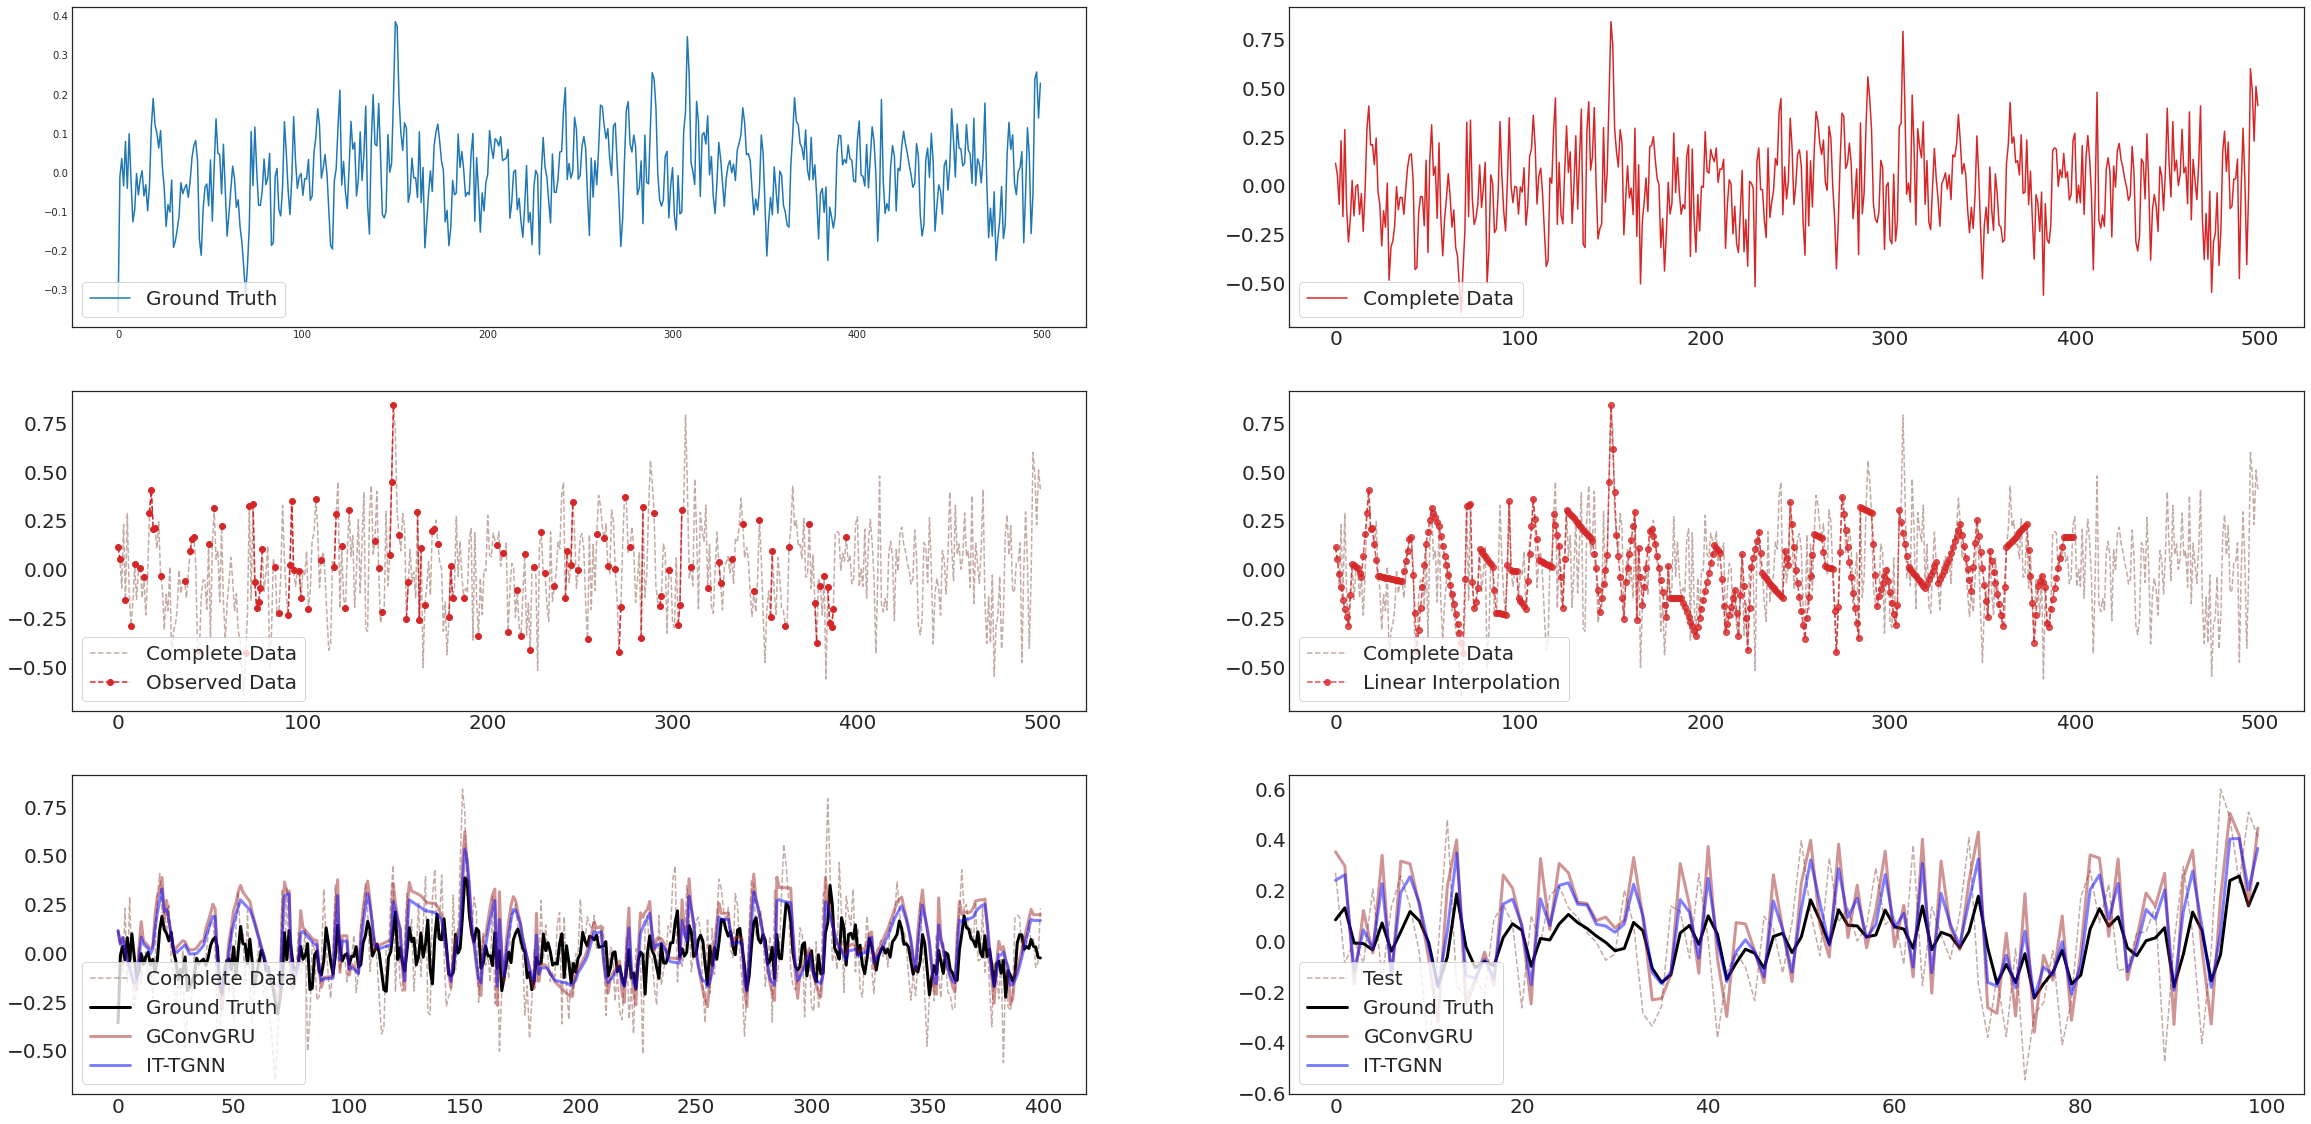

In [43]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2,figsize=(40,20))
    # fig.suptitle('Figure 1(node 1)',fontsize=40)
    ax1.plot(a_ar_values_true,label='Ground Truth')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    
    ax2.plot(np.array(data_dict['FX'])[:,0],'-',color='C3',label='Complete Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(torch.cat([torch.tensor(dataset.features)[:2,0,0],torch.tensor(train_dataset_miss_rand.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(torch.cat([torch.tensor(dataset.features)[:2,0,0],torch.tensor(train_dataset_padded_rand.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',alpha=0.8,label='Linear Interpolation')
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
    
    ax5.plot(torch.tensor(data_dict['FX'])[:400,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax5.plot(a_ar_values_true[:400],color='black',label='Ground Truth',lw=3)
    ax5.plot(evtor_rand.fhat_tr[:,0],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax5.plot(evtor_rand_it.fhat_tr[:,0],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    # ax4.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax4.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax5.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax5.tick_params(axis='y', labelsize=20)
    ax5.tick_params(axis='x', labelsize=20)
    
    ax6.plot(torch.tensor(data_dict['FX'])[400:,0],'--',color='C5',alpha=0.5,label='Test')
    ax6.plot(a_ar_values_true[400:],color='black',label='Ground Truth',lw=3)
    ax6.plot(evtor_rand.fhat_test[:,0],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax6.plot(evtor_rand_it.fhat_test[:,0],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    ax6.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax6.tick_params(axis='y', labelsize=20)
    ax6.tick_params(axis='x', labelsize=20)
# # plt.savefig('try2_node1.png')

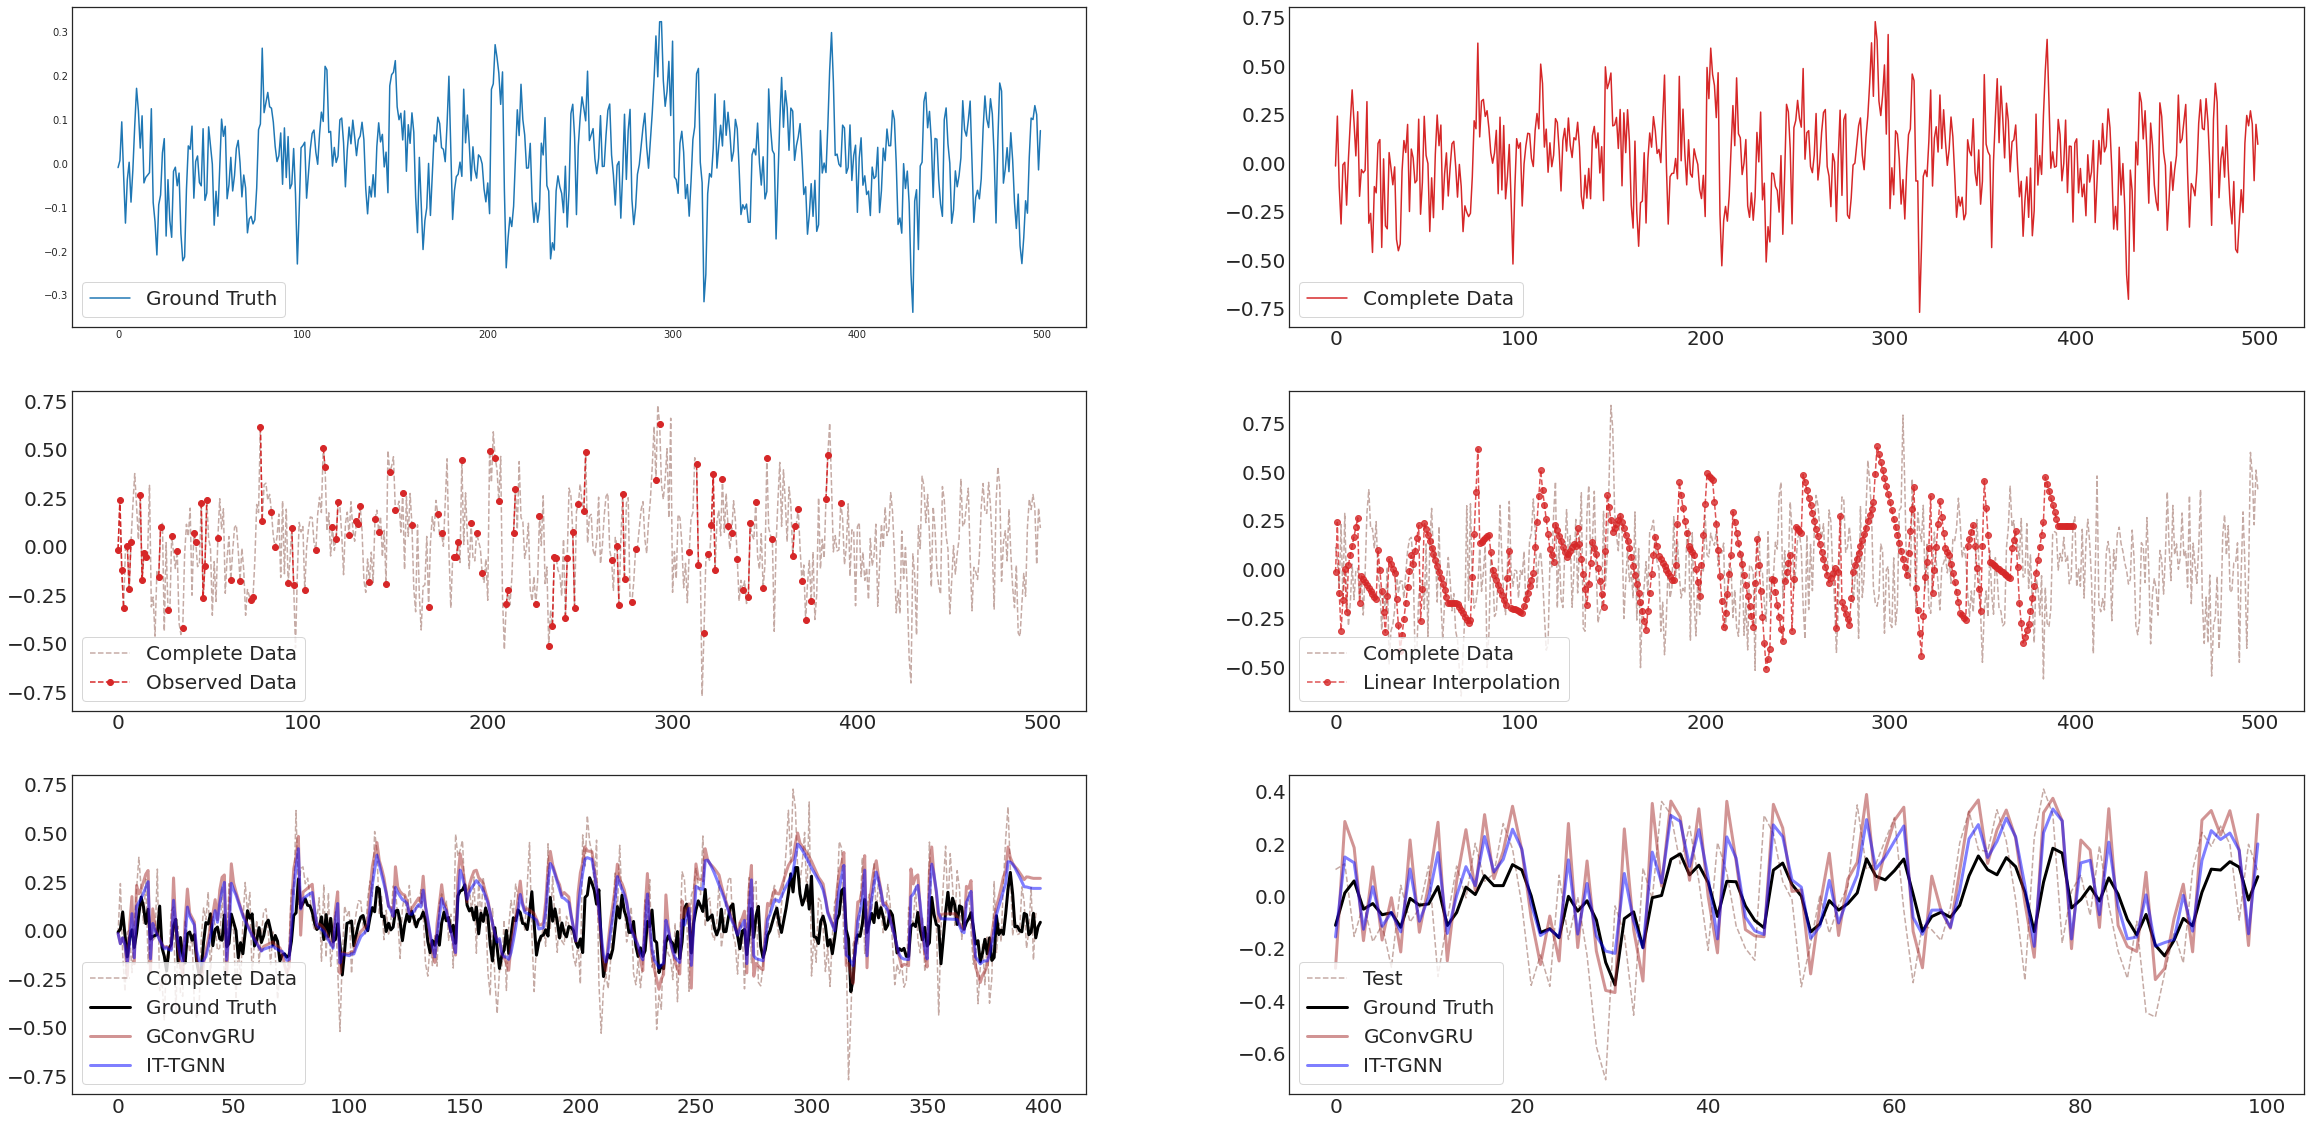

In [44]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2,figsize=(40,20))
    # fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(b_ar_values_true,label='Ground Truth')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    
    ax2.plot(np.array(data_dict['FX'])[:,1],'-',color='C3',label='Complete Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(np.array(data_dict['FX'])[:,1],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(torch.cat([torch.tensor(dataset.features)[:2,1,0],torch.tensor(train_dataset_miss_rand.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(torch.cat([torch.tensor(dataset.features)[:2,1,0],torch.tensor(train_dataset_padded_rand.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',alpha=0.8,label='Linear Interpolation')
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
    
    ax5.plot(torch.tensor(data_dict['FX'])[:399,1],'--',color='C5',alpha=0.5,label='Complete Data')
    ax5.plot(b_ar_values_true[:400],color='black',label='Ground Truth',lw=3)
    ax5.plot(evtor_rand.fhat_tr[:,1],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax5.plot(evtor_rand_it.fhat_tr[:,1],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    # ax5.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax5.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax5.tick_params(axis='y', labelsize=20)
    ax5.tick_params(axis='x', labelsize=20)
    
    ax6.plot(torch.tensor(data_dict['FX'])[400:,1],'--',color='C5',alpha=0.5,label='Test')
    ax6.plot(b_ar_values_true[400:],color='black',label='Ground Truth',lw=3)
    ax6.plot(evtor_rand.fhat_test[:,1],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax6.plot(evtor_rand_it.fhat_test[:,1],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    ax6.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax6.tick_params(axis='y', labelsize=20)
    ax6.tick_params(axis='x', labelsize=20)
# # plt.savefig('try2_node1.png')

# Block

In [45]:
data_dict = load_data('toy_ex_dataset.pkl')

In [46]:
loader = itstgcn.DatasetLoader(data_dict)

In [47]:
dataset = loader.get_dataset(lags=2)

In [48]:
train_dataset, test_dataset = itstgcn.temporal_signal_split(dataset, train_ratio=0.8)

In [49]:
mindex_block = [list(range(80,180)),list(range(100,190))]

In [50]:
train_dataset_miss_block = itstgcn.miss(train_dataset,mindex_block,mtype='block')

In [51]:
train_dataset_padded_block = itstgcn.padding(train_dataset_miss_block) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [52]:
lrnr_block = itstgcn.StgcnLearner(train_dataset_padded_block)

In [53]:
lrnr_block.learn(filters=12,epoch=5)

5/5

In [54]:
lrnr_block_it = itstgcn.ITStgcnLearner(train_dataset_padded_block)

In [55]:
lrnr_block_it.learn(filters=12,epoch=5)

5/5

`-` 모형 평가 및 시각화

In [56]:
evtor_block = itstgcn.Evaluator(lrnr_block,train_dataset_padded_block,test_dataset)

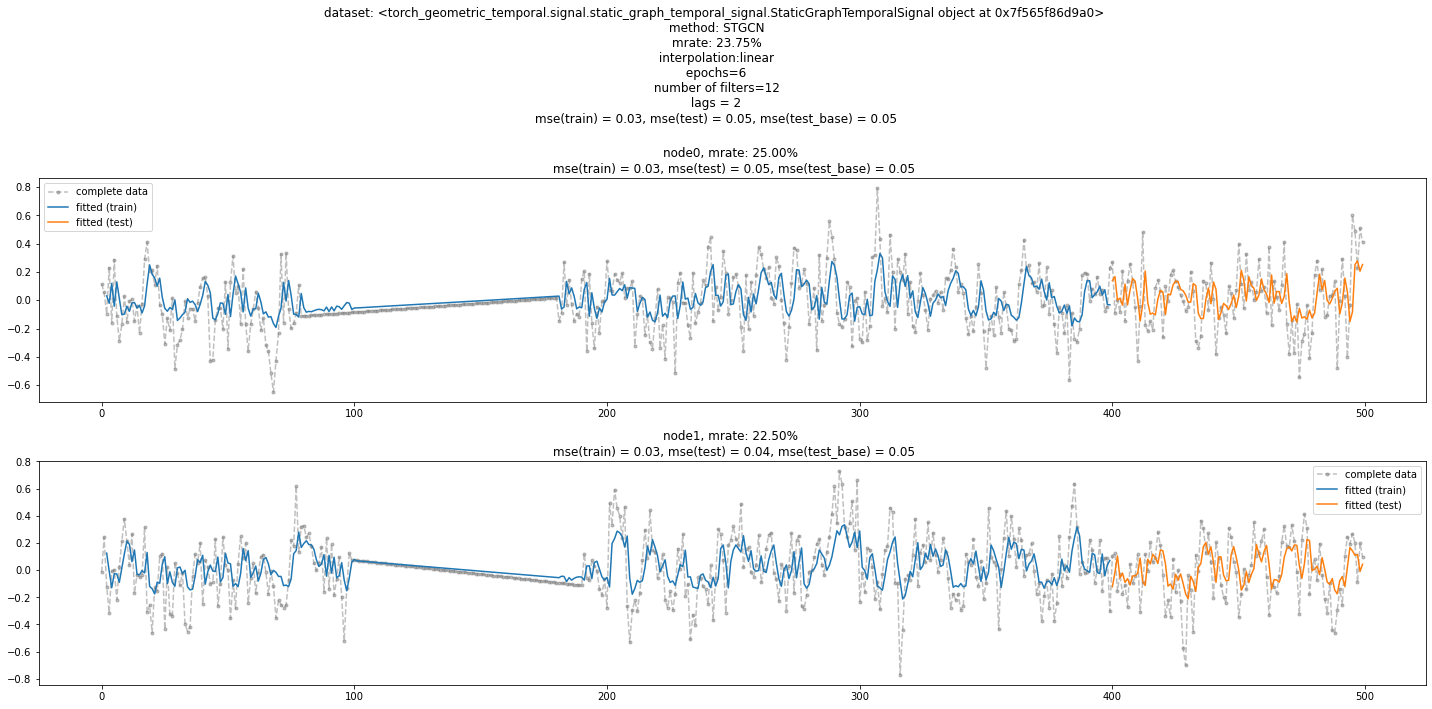

In [57]:
fig = evtor_block.plot('--.',h=5,max_node=2,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig

In [58]:
evtor_block_it = itstgcn.Evaluator(lrnr_block_it,train_dataset_padded_block,test_dataset)

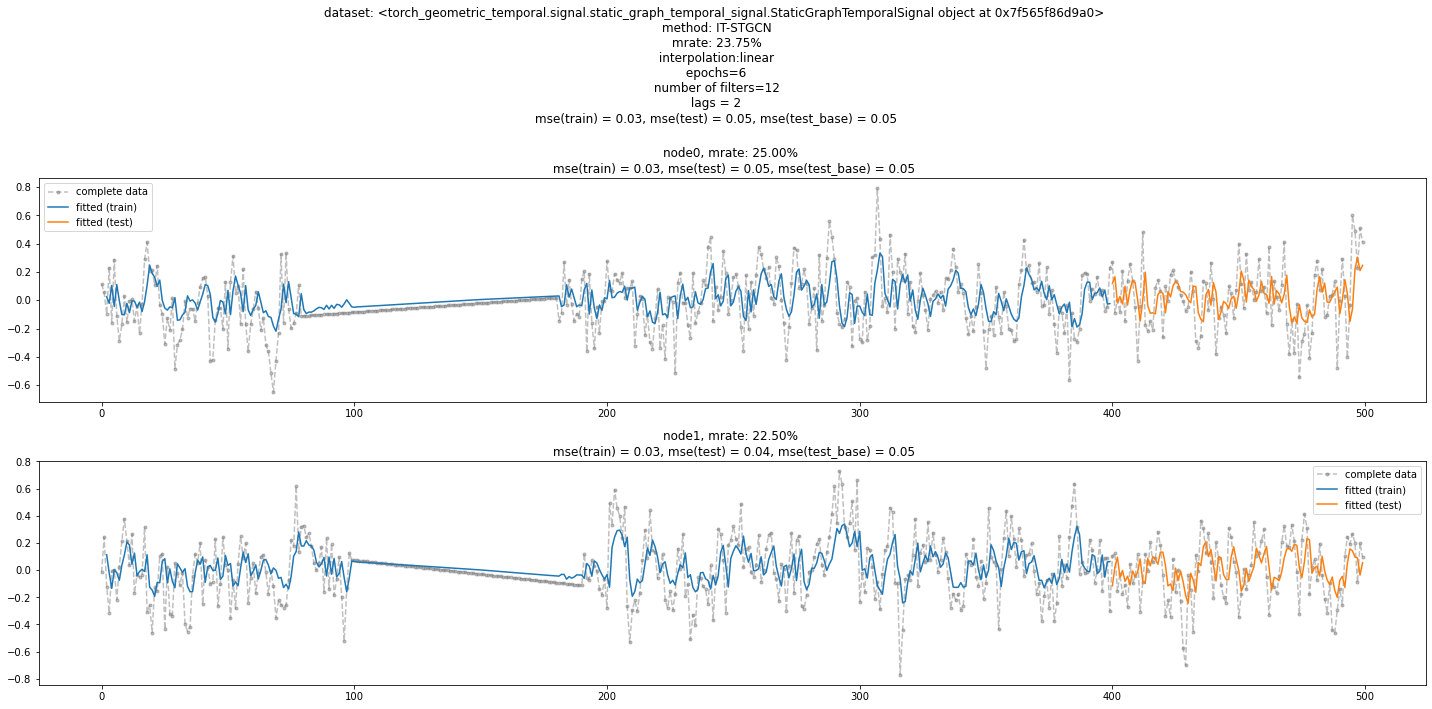

In [59]:
fig = evtor_block_it.plot('--.',h=5,max_node=2,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig

In [ ]:
evtor_block.mse

In [ ]:
evtor_block_it.mse

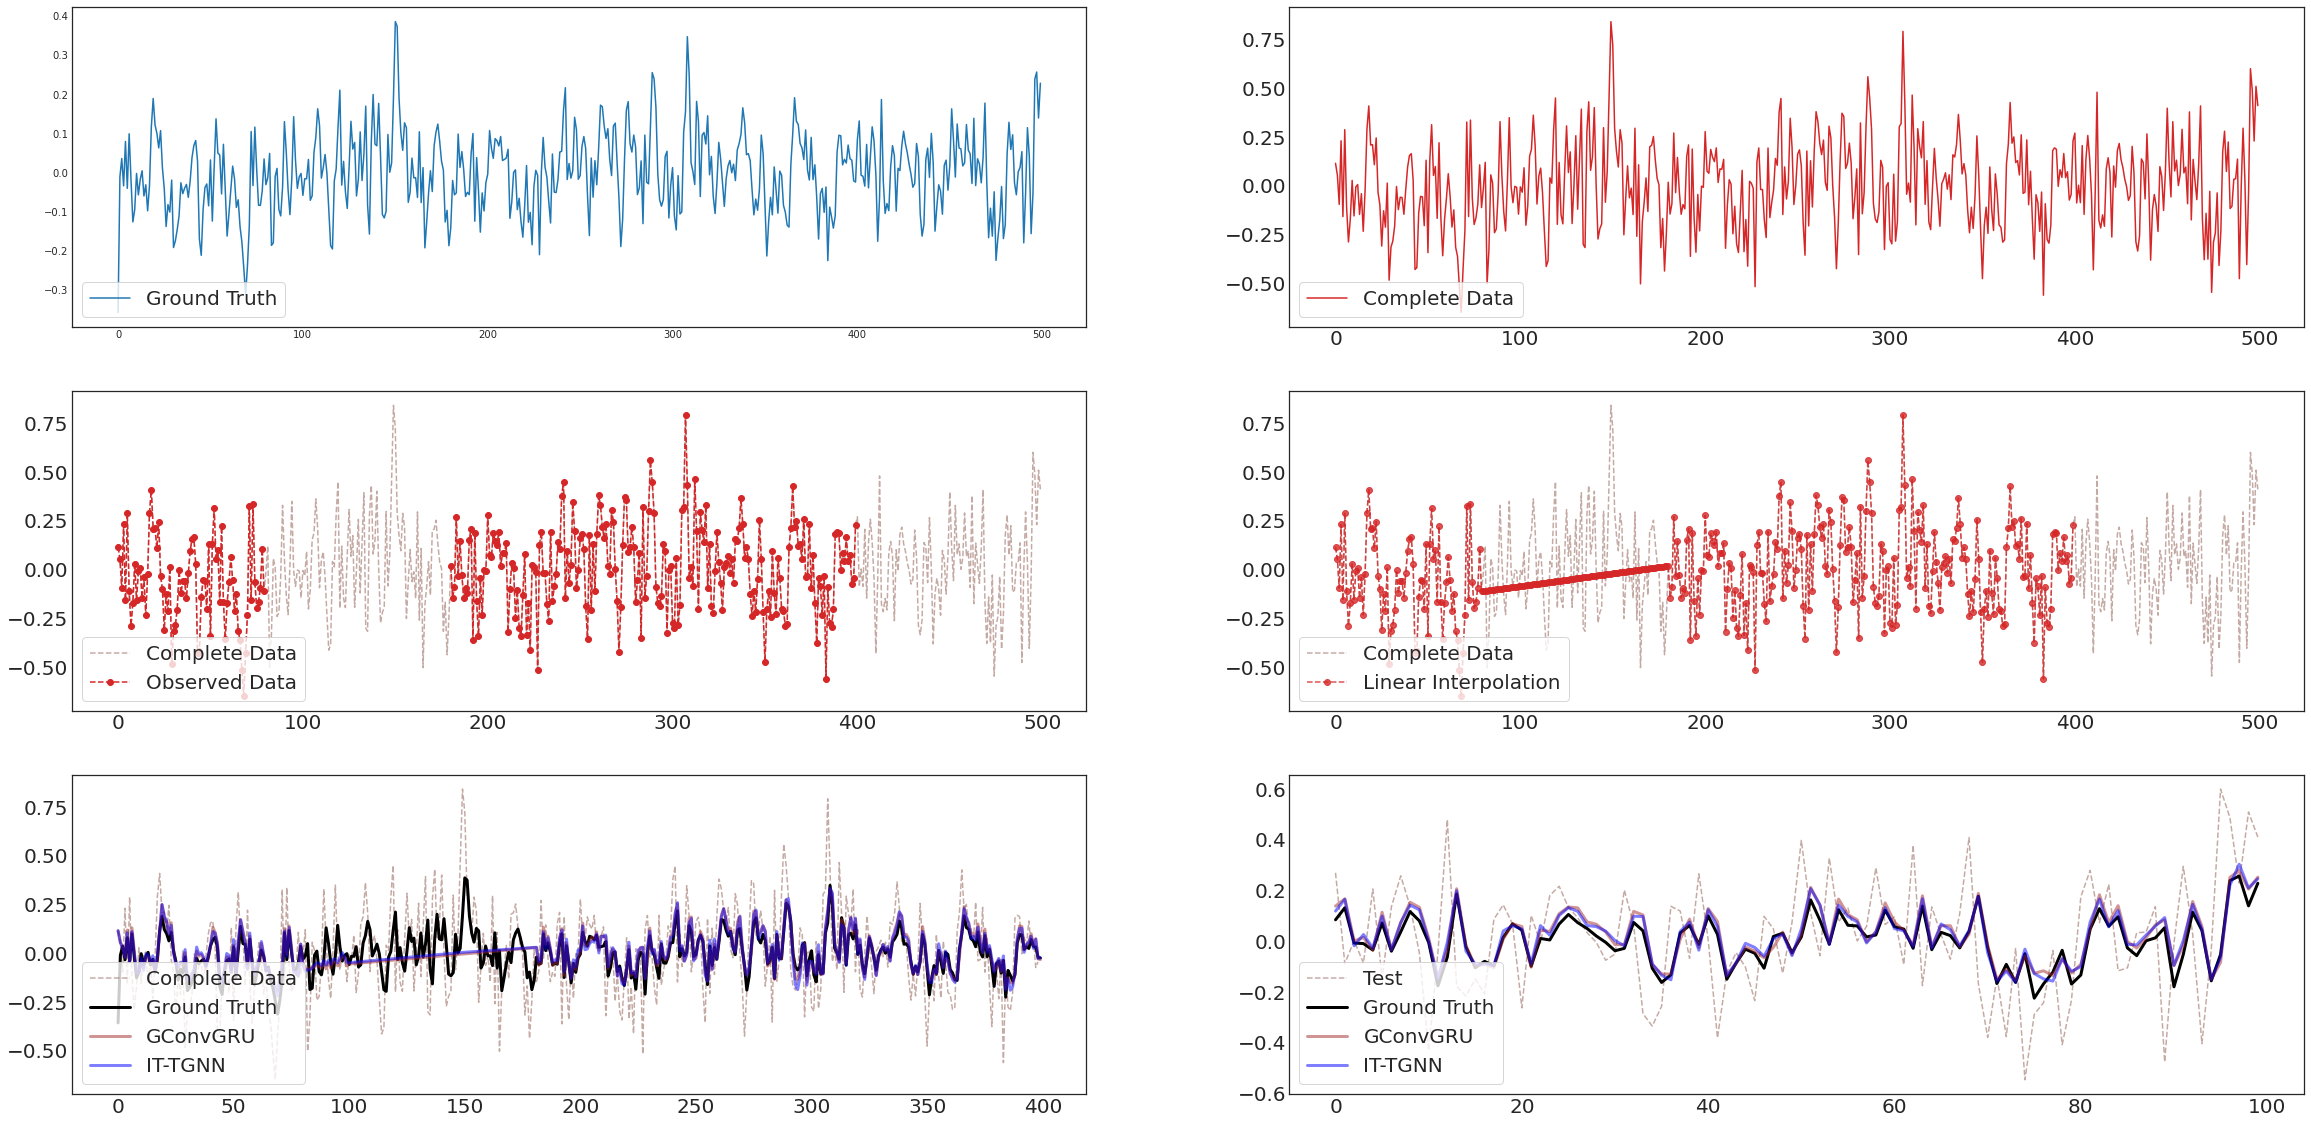

In [60]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2,figsize=(40,20))
    # fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(a_ar_values_true,label='Ground Truth')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    
    ax2.plot(np.array(data_dict['FX'])[:,0],'-',color='C3',label='Complete Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(torch.cat([torch.tensor(dataset.features)[:2,0,0],torch.tensor(train_dataset_miss_block.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(torch.cat([torch.tensor(dataset.features)[:2,0,0],torch.tensor(train_dataset_padded_block.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',alpha=0.8,label='Linear Interpolation')
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
    
    ax5.plot(torch.tensor(data_dict['FX'])[:399,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax5.plot(a_ar_values_true[:400],color='black',label='Ground Truth',lw=3)
    ax5.plot(evtor_block.fhat_tr[:,0],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax5.plot(evtor_block_it.fhat_tr[:,0],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    # ax5.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax5.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax5.tick_params(axis='y', labelsize=20)
    ax5.tick_params(axis='x', labelsize=20)
    
    ax6.plot(torch.tensor(data_dict['FX'])[400:,0],'--',color='C5',alpha=0.5,label='Test')
    ax6.plot(a_ar_values_true[400:],color='black',label='Ground Truth',lw=3)
    ax6.plot(evtor_block.fhat_test[:,0],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax6.plot(evtor_block_it.fhat_test[:,0],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    ax6.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax6.tick_params(axis='y', labelsize=20)
    ax6.tick_params(axis='x', labelsize=20)
# # plt.savefig('try2_node1.png')

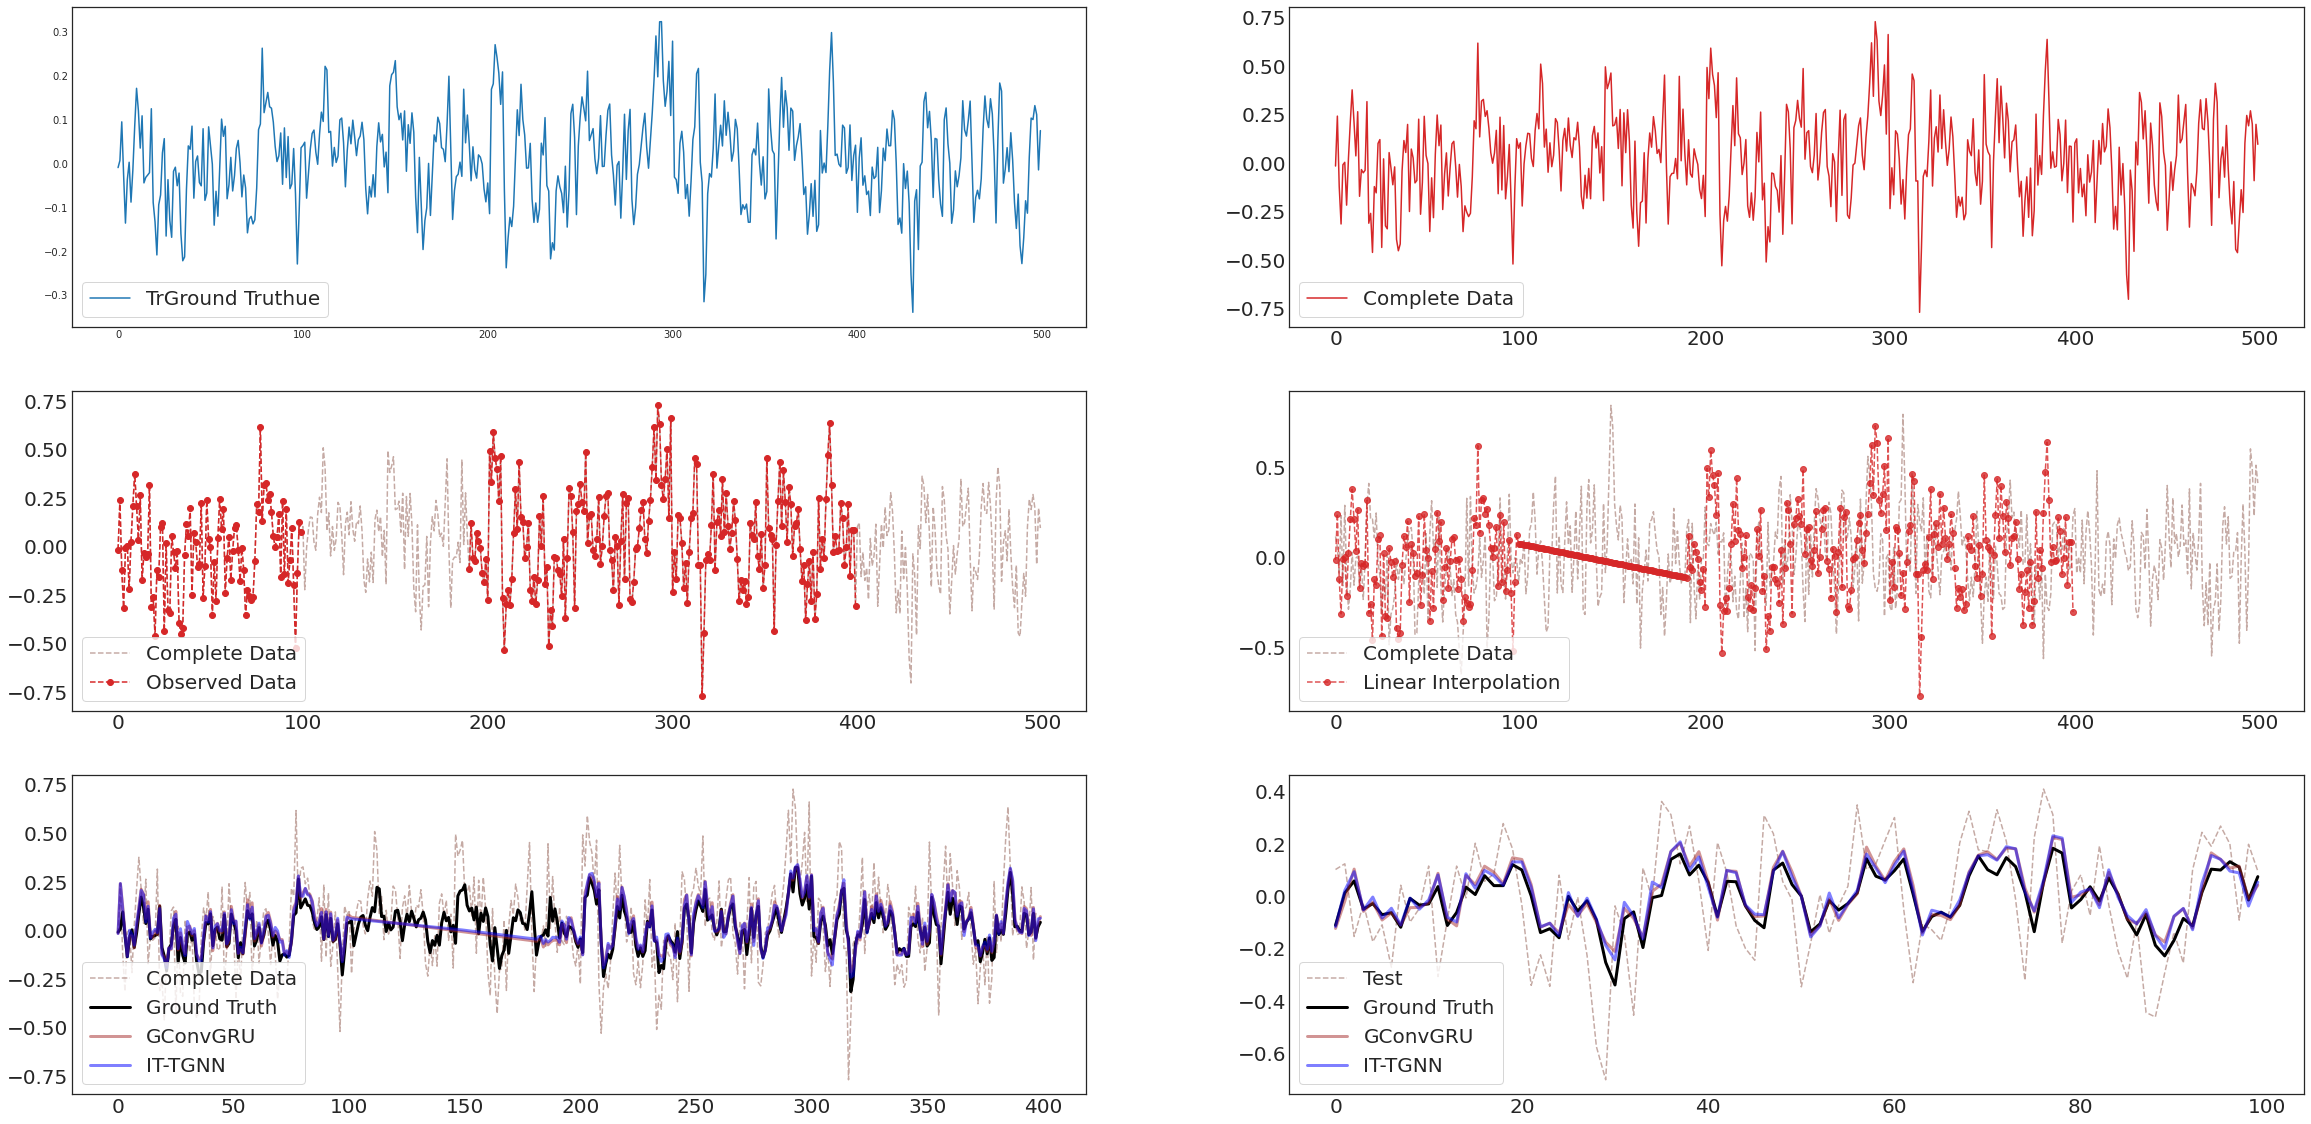

In [61]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2,figsize=(40,20))
    # fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(b_ar_values_true,label='TrGround Truthue')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    
    ax2.plot(np.array(data_dict['FX'])[:,1],'-',color='C3',label='Complete Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(np.array(data_dict['FX'])[:,1],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(torch.cat([torch.tensor(dataset.features)[:2,1,0],torch.tensor(train_dataset_miss_block.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(torch.cat([torch.tensor(dataset.features)[:2,1,0],torch.tensor(train_dataset_padded_block.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',alpha=0.8,label='Linear Interpolation')
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
    
    ax5.plot(torch.tensor(data_dict['FX'])[:399,1],'--',color='C5',alpha=0.5,label='Complete Data')
    ax5.plot(b_ar_values_true[:400],color='black',label='Ground Truth',lw=3)
    ax5.plot(evtor_block.fhat_tr[:,1],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax5.plot(evtor_block_it.fhat_tr[:,1],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    # ax5.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax5.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax5.tick_params(axis='y', labelsize=20)
    ax5.tick_params(axis='x', labelsize=20)
    
    ax6.plot(torch.tensor(data_dict['FX'])[400:,1],'--',color='C5',alpha=0.5,label='Test')
    ax6.plot(b_ar_values_true[400:],color='black',label='Ground Truth',lw=3)
    ax6.plot(evtor_block.fhat_test[:,1],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax6.plot(evtor_block_it.fhat_test[:,1],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    ax6.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax6.tick_params(axis='y', labelsize=20)
    ax6.tick_params(axis='x', labelsize=20)
# # plt.savefig('try2_node1.png')

# Random & Block

In [62]:
data_dict = load_data('toy_ex_dataset.pkl')

In [63]:
loader = itstgcn.DatasetLoader(data_dict)

In [64]:
dataset = loader.get_dataset(lags=2)

In [65]:
train_dataset, test_dataset = itstgcn.temporal_signal_split(dataset, train_ratio=0.8)

In [66]:
mindex_rdbl = [random.sample(range(0, 400), int(400*0.7)),[np.array(list(range(150,220)))]]

In [67]:
train_dataset_miss_rdbl = itstgcn.miss(train_dataset,mindex_rdbl,mtype='block')

In [68]:
train_dataset_padded_rdbl = itstgcn.padding(train_dataset_miss_rdbl) # padding(train_dataset_miss,method='linear'와 같음)

`-` 학습

In [69]:
lrnr_rdbl = itstgcn.StgcnLearner(train_dataset_padded_rdbl)

In [70]:
lrnr_rdbl.learn(filters=12,epoch=5)

5/5

In [71]:
lrnr_rdbl_it = itstgcn.ITStgcnLearner(train_dataset_padded_rdbl)

In [72]:
lrnr_rdbl_it.learn(filters=12,epoch=5)

5/5

`-` 모형 평가 및 시각화

In [73]:
evtor_rdbl = itstgcn.Evaluator(lrnr_rdbl,train_dataset_padded_rdbl,test_dataset)

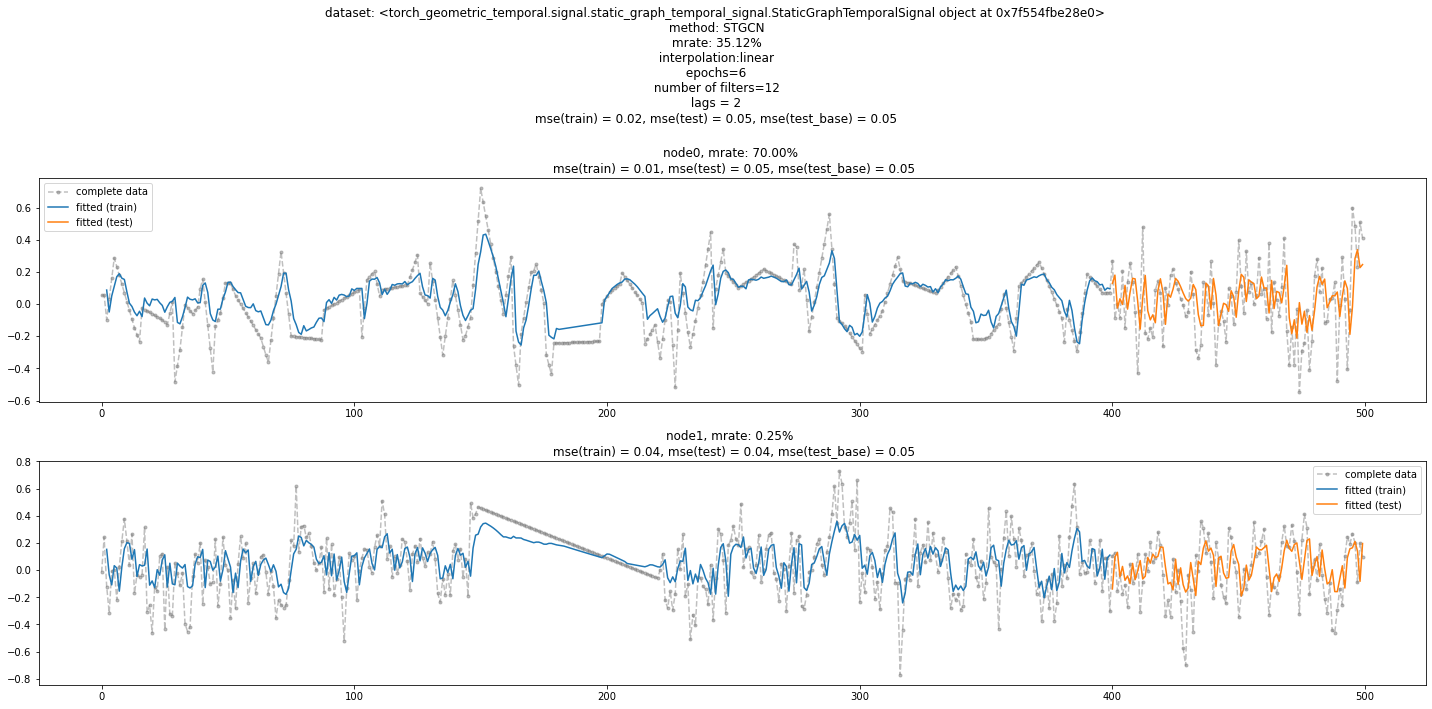

In [74]:
fig = evtor_rdbl.plot('--.',h=5,max_node=2,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig

In [ ]:
evtor_rdbl_it = itstgcn.Evaluator(lrnr_rdbl_it,train_dataset_padded_rdbl,test_dataset)

In [ ]:
fig = evtor_rdbl_it.plot('--.',h=5,max_node=2,label='complete data',alpha=0.5) # max_nodes 는 1보다 커야함
fig.set_figwidth(20)
fig.set_figheight(10)
fig.tight_layout()
fig

In [ ]:
evtor_rdbl.mse

In [ ]:
evtor_rdbl_it.mse

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(3, 2,figsize=(40,20))
    # fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(a_ar_values_true,label='Ground Truth')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    
    ax2.plot(np.array(data_dict['FX'])[:,0],'-',color='C3',label='Complete Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(torch.cat([torch.tensor(dataset.features)[:2,0,0],torch.tensor(train_dataset_miss_rdbl.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',label='Observed Data')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(torch.cat([torch.tensor(dataset.features)[:2,0,0],torch.tensor(train_dataset_padded_rdbl.targets).reshape(-1,2)[:,0]],dim=0),'--o',color='C3',alpha=0.8,label='Linear Interpolation')
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
    
    ax5.plot(torch.tensor(data_dict['FX'])[:399,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax5.plot(a_ar_values_true[:400],color='black',label='Ground Truth',lw=3)
    ax5.plot(evtor_rdbl.fhat_tr[:,0],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax5.plot(evtor_rdbl_it.fhat_tr[:,0],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    # ax5.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax5.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax5.tick_params(axis='y', labelsize=20)
    ax5.tick_params(axis='x', labelsize=20)
    
    ax6.plot(torch.tensor(data_dict['FX'])[400:,0],'--',color='C5',alpha=0.5,label='Test')
    ax6.plot(a_ar_values_true[400:],color='black',label='Ground Truth',lw=3)
    ax6.plot(evtor_rdbl.fhat_test[:,0],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax6.plot(evtor_rdbl_it.fhat_test[:,0],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    ax6.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax6.tick_params(axis='y', labelsize=20)
    ax6.tick_params(axis='x', labelsize=20)
# # plt.savefig('try2_node1.png')

In [ ]:
with plt.style.context('seaborn-white'):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2,figsize=(40,20))
    # fig.suptitle('Figure 1(node 1)',fontsize=40)
    
    ax1.plot(b_ar_values_true,label='Ground Truth')
    ax1.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    
    ax2.plot(np.array(data_dict['FX'])[:,1],'-',color='C3',label='Complete Data')
    ax2.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax2.tick_params(axis='y', labelsize=20)
    ax2.tick_params(axis='x', labelsize=20)
    
    ax3.plot(np.array(data_dict['FX'])[:,1],'--',color='C5',alpha=0.5,label='Complete Data')
    ax3.plot(torch.cat([torch.tensor(dataset.features)[:2,1,0],torch.tensor(train_dataset_miss_rand.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',label='Observed Data')
    ax3.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    
    ax4.plot(np.array(data_dict['FX'])[:,0],'--',color='C5',alpha=0.5,label='Complete Data')
    ax4.plot(torch.cat([torch.tensor(dataset.features)[:2,1,0],torch.tensor(train_dataset_padded_rdbl.targets).reshape(-1,2)[:,1]],dim=0),'--o',color='C3',alpha=0.8,label='Linear Interpolation')
    ax4.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax4.tick_params(axis='y', labelsize=20)
    ax4.tick_params(axis='x', labelsize=20)
    
    ax5.plot(torch.tensor(data_dict['FX'])[:400,1],'--',color='C5',alpha=0.5,label='Complete Data')
    ax5.plot(b_ar_values_true[:400],color='black',label='Ground Truth',lw=3)
    ax5.plot(evtor_rdbl.fhat_tr[:,1],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax5.plot(evtor_rdbl_it.fhat_tr[:,1],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    # ax5.plot(55, 0, 'o', markersize=100, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(150, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    # ax5.plot(185, 0, 'o', markersize=80, markerfacecolor='none', markeredgecolor='red',markeredgewidth=3)
    ax5.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax5.tick_params(axis='y', labelsize=20)
    ax5.tick_params(axis='x', labelsize=20)
    
    ax6.plot(torch.tensor(data_dict['FX'])[399:,1],'--',color='C5',alpha=0.5,label='Test')
    ax6.plot(b_ar_values_true[400:],color='black',label='Ground Truth',lw=3)
    ax6.plot(evtor_rdbl.fhat_test[:,1],color='brown',lw=3,label='GConvGRU',alpha=0.5)
    ax6.plot(evtor_rdbl_it.fhat_test[:,1],color='blue',lw=3,label='IT-TGNN',alpha=0.5)
    ax6.legend(fontsize=20,loc='lower left',facecolor='white', frameon=True)
    ax6.tick_params(axis='y', labelsize=20)
    ax6.tick_params(axis='x', labelsize=20)
# # plt.savefig('try2_node1.png')